In [28]:
from Functions import*

# define your frequencies: 10 - 1000
freq = Frequencies(10, 100e3, 10)

# set which measurements you'd like to use as its own element in a list
# mainReadings = ["R", "C", "L", "Z"]
# minorReadings = ["X", "D", "Q", "THR" (θ), "ESR"]
mainReadings = ['Z']
minorReadings = ['THR']


params = input('Input material i.e. P8 PVC or Mineral Oil')
params = f'{params} {mainReadings[0]}-{minorReadings[0]}'

"""DEF cell is 12.75 mm diameter and 1.11 mm thick"""
area = np.pi/4*12.75**2     # float(input('Input the gel area in mm i.e. 10.2'))**2
thickness = 1.11            # input('Input the gel thickness in mm i.e. 1')

try:
    # connect to the LCR meter
    ser = DeviceConnect('COM5')

    # ser - serial connection
    # freq - user frequencies (Hz)
    # mainReadings - inductance measurements (Ohm, H, C)
    # minorReadings - secondary inducatce measurement (deg, Ohm, None)
    # voltage - the voltage applied between electrodes (V)
    # biasVoltage - the biasvoltage (V)
    voltage = 1 
    biasVoltage = 0
    dataFrame = Experiment(ser, freq, mainReadings, minorReadings, voltage, biasVoltage)
    DeviceDisconnect(ser)
    DataExport(params, dataFrame, f'{area}, {thickness}, {1} - Area (mm), thickness (mm), voltage (V)')

except: 
    print('Test Aborted')
    DeviceDisconnect(ser)     


Test Aborted


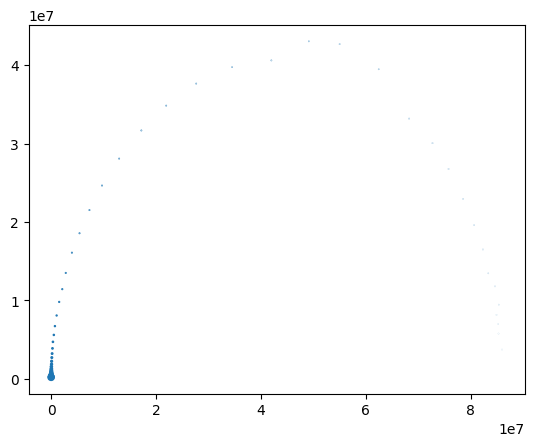

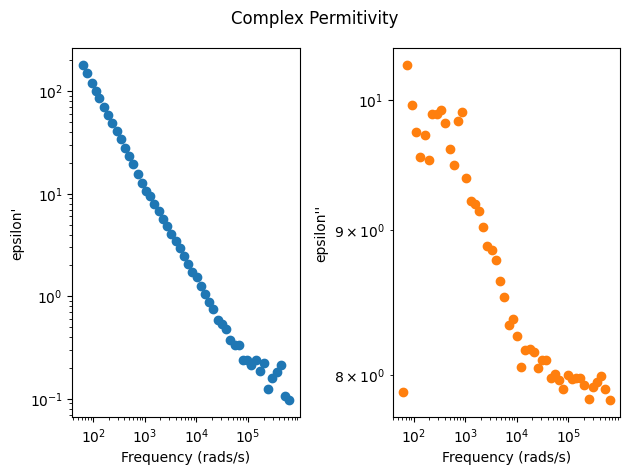

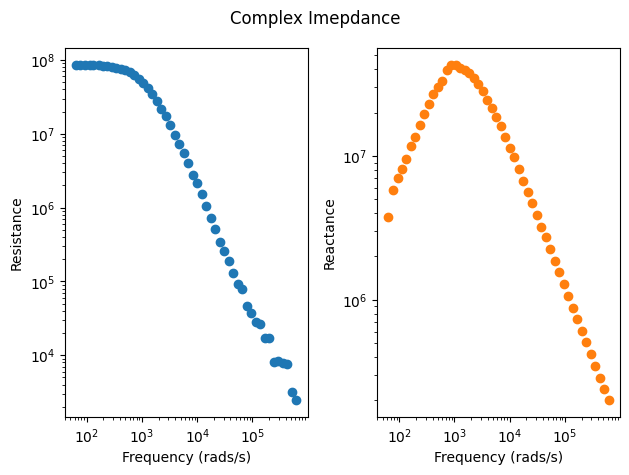

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# load the area, thickness, and voltage from the first line
params = np.loadtxt('Data/DBP Z-THR.csv', delimiter = ',', dtype = str, max_rows = 1)
area, thickness, voltage = [float(params[0]), float(params[1]), float(params[2].split('-')[0])]

# load the data and define the appropiate variables
data = np.loadtxt('Data/DBP Z-THR.csv', delimiter = ',', skiprows = 3,  dtype = float)
freq = 2*np.pi*data[:,0]
Z = data[:,1]
THR = data[:,3]
ZComplex = Z*np.exp(np.deg2rad(THR)*1j)


# determine perimittivity
C0 = area/thickness*8.85e-15 # area (mm^2), thickness (mm), vacuum permitivity (F/mm)
permitivity = 1/(ZComplex*freq*C0)

plt.scatter(ZComplex.real, np.abs(ZComplex.imag), s = 20*freq/np.max(freq))
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].scatter(freq, permitivity.real)
axs[1].scatter(freq, permitivity.imag, c = 'tab:orange')

axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_yscale('log')

axs[0].set_xlabel('Frequency (rads/s)')
axs[1].set_xlabel('Frequency (rads/s)')
axs[0].set_ylabel('epsilon\'')
axs[1].set_ylabel('epsilon\'\'')
fig.suptitle('Complex Permitivity')
plt.tight_layout()
plt.show()  


fig, axs = plt.subplots(1, 2)
axs[0].scatter(freq, ZComplex.real)
axs[1].scatter(freq, np.abs(ZComplex.imag), c = 'tab:orange')

axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_yscale('log')

axs[0].set_xlabel('Frequency (rads/s)')
axs[1].set_xlabel('Frequency (rads/s)')
axs[0].set_ylabel('Resistance')
axs[1].set_ylabel('Reactance')
fig.suptitle('Complex Imepdance')
plt.tight_layout()
plt.show()  # Display plot